In [1]:
%matplotlib inline

#from dask.distributed import Client, progress
#import dask.array as da
import xarray as xr


import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('once')

import logging
logger = logging.getLogger("distributed.utils_perf")
logger.setLevel(logging.ERROR)

#from dask.diagnostics import ProgressBar

In [2]:
#client = Client(processes=False, threads_per_worker=4,n_workers=1, memory_limit='2GB')

#client

NameError: name 'Client' is not defined

In [ ]:
data = xr.open_rasterio('../data/prueba/pequena.tif',chunks={'band': 6, 'x': 1024, 'y': 1024})
data.variable.data

In [ ]:
from keras.models import load_model
model = load_model('my_model.h5')

def predict_with_class(model,instance=[]):
    proba = model.predict([[ instance ]])
    index = np.argmax(proba)
    # classes = ['agua','bosque','agua_o_bosque','ninguno']
    classes = [1,2,3,4]
    return classes[index]

def predict(*instance):
    print(instance,len(instance[0]))
    if len(instance) == 6:
        proba = model.predict([[ instance ]])
        index = np.argmax(proba)
        # classes = ['agua','bosque','agua_o_bosque','ninguno']
        classes = [1,2,3,4]
        return classes[index]
    return -1

In [ ]:
import dask.array as da
from time import sleep
from distributed.diagnostics import progress

from dask.diagnostics import ProgressBar
ProgressBar().register()

def hola(*instance):
    print(instance)
    return 1

# with ProgressBar():
# da.apply_along_axis(sum, 0, data).compute()
future = da.apply_along_axis(predict, 0, data)
future.compute()

In [ ]:
data[1].values

In [ ]:
print(data[0].values) 
print(data[1].values) 
print(data[2].values) 
print(data[3].values) 
print(data[4].values) 
print(data[5].values) 

In [ ]:
print('Pixel Band Value:', data[0][0][0])
print('Pixel Band Value:', data[1][0][0])
print('Pixel Band Value:', data[2][0][0])
print('Pixel Band Value:', data[3][0][0])
print('Pixel Band Value:', data[4][0][0])
print('Pixel Band Value:', data[5][0][0])

In [ ]:
data[dict(band=slice(1, 6))].values

In [ ]:
inv = data[dict(band=slice(1, 6))].values
inv

In [ ]:
np.apply_along_axis(sum, 0, inv)

In [ ]:
function = lambda *args,**kwags: sum(list(args))
xr.apply_ufunc(function, inv[0], inv[1],inv[2],inv[3],inv[4])

In [ ]:
# inv = data[dict(band=slice(1, 6))]
# inv.shape

In [ ]:
# function = lambda *args,**kwags: sum(list(args))
# inv.apply_ufunc(function,dim=0)

In [ ]:
slice(1, 6)

In [ ]:
# from spectral import *

# img = open_image('../data/prueba/pequena.tif')
# view = imshow(img, (29, 19, 9))

import rasterio
from rasterio.plot import show
src = rasterio.open('../data/prueba/pequena.tif')

show(src)
# src

* https://gis.stackexchange.com/questions/306164/how-to-visualize-multiband-imagery-using-rasterio/306195
* https://examples.dask.org/applications/satellite-imagery-geotiff.html
* https://rabernat.github.io/research_computing/xarray.html

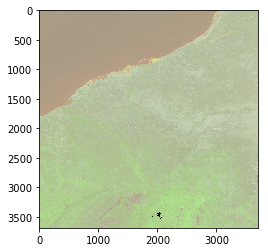

In [8]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Open the file:
raster = rasterio.open('../../data/pequena.tif')

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Convert to numpy arrays
nir = raster.read(1)
red = raster.read(3)
green = raster.read(2)

# Normalize band DN
nir_norm = normalize(nir)
red_norm = normalize(red)
green_norm = normalize(green)

# Stack bands
nrg = np.dstack((nir_norm, red_norm, green_norm))

# View the color composite
plt.imshow(nrg)

In [ ]:
red = xr.open_rasterio('../data/prueba/pequena.tif', chunks={'band': 1, 'x': 1024, 'y': 1024})

In [ ]:
red[0].variable.data